In [1]:
from numpy.polynomial import Legendre
from matplotlib.colors import TwoSlopeNorm

from unhippo.lds import UnHiPPOSystem

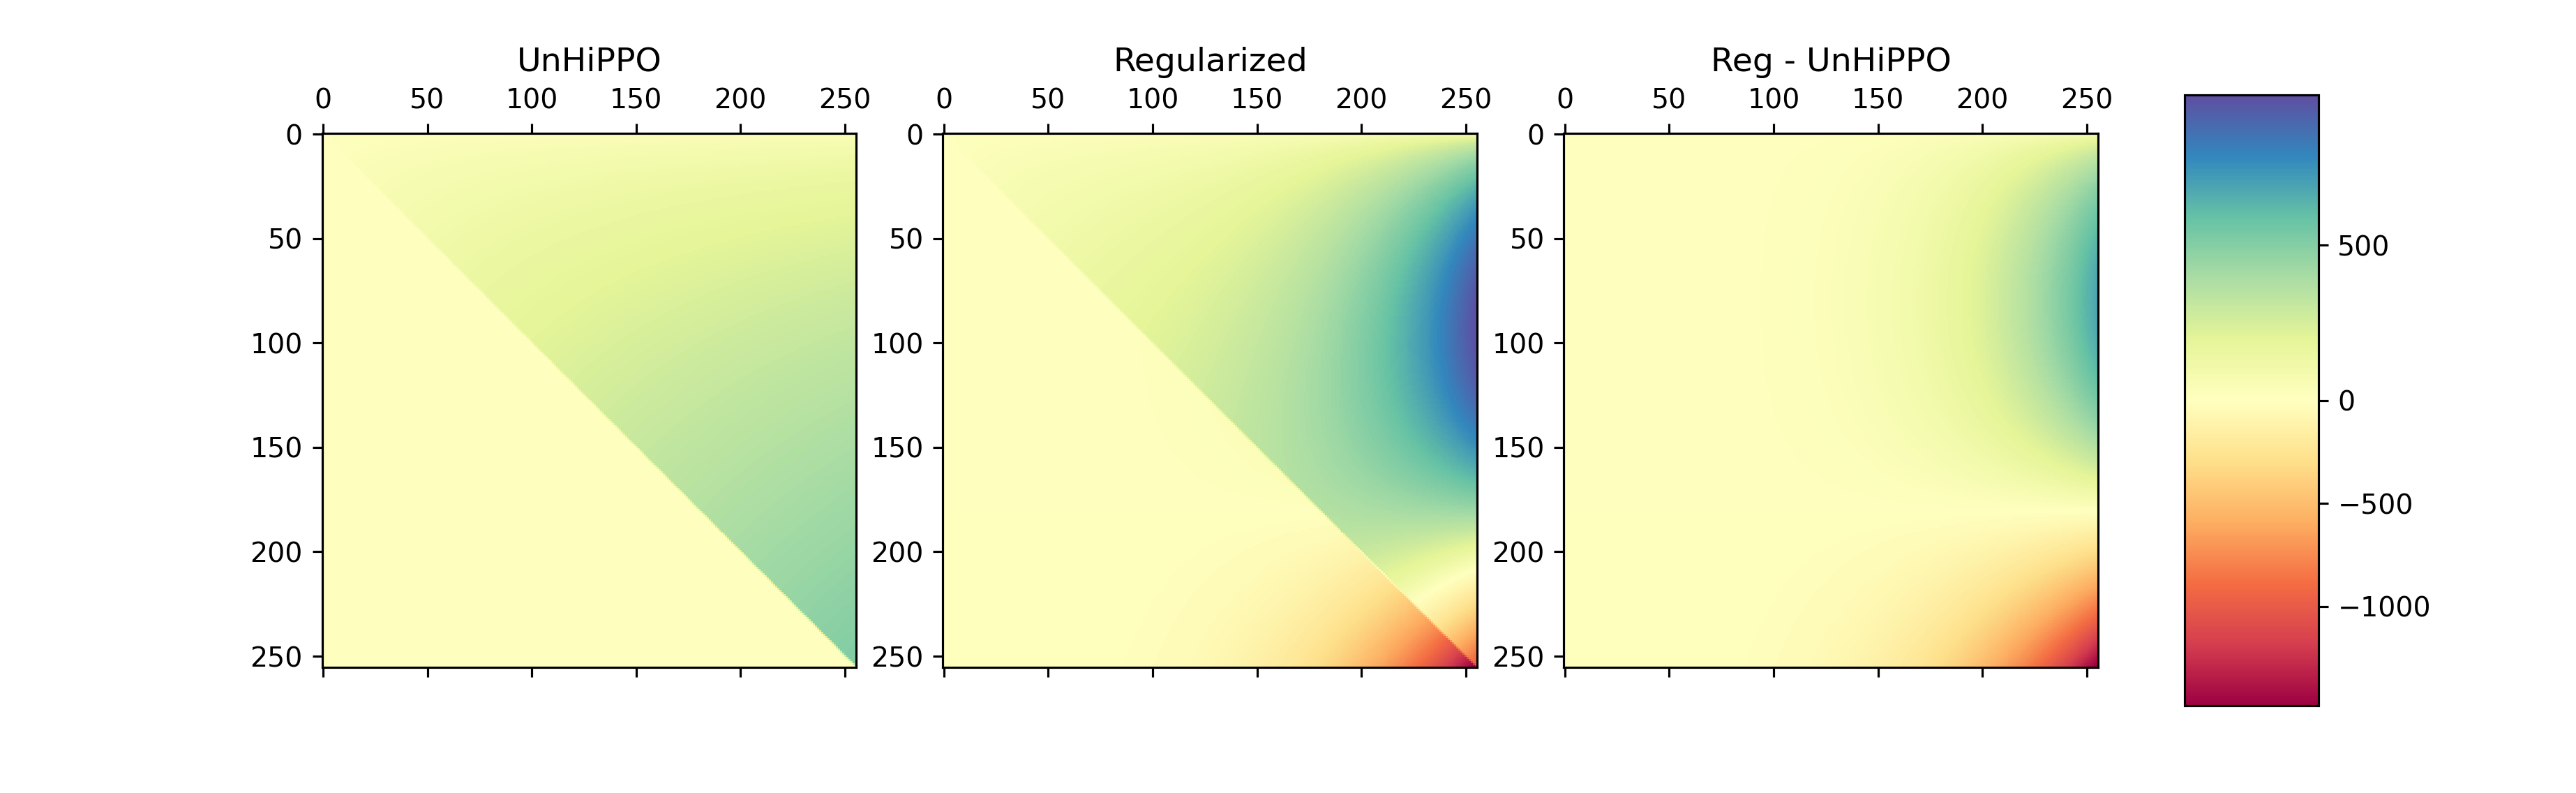

In [2]:
n = 256
with_text = n <= 10
hippo = UnHiPPOSystem(n, regularize_derivative=False).double()
A = hippo.system_dynamics_matrix.compute(1).numpy()
hippo = UnHiPPOSystem(n, regularize_derivative=True).double()
A_reg = hippo.system_dynamics_matrix.compute(1).numpy()

A_diff = A_reg - A

vmin = min(A.min(), A_reg.min())
vmax = max(A.max(), A_reg.max())
norm = TwoSlopeNorm(0, vmin, vmax)
cmap = "Spectral"

fig = pp.figure(figsize=(12 + 1, 4))
gs = fig.add_gridspec(ncols=4, width_ratios=(4, 4, 4, 1))
ax = fig.add_subplot(gs[0])
ax.set_title("UnHiPPO")
ax.matshow(A, norm=norm, cmap=cmap)
if with_text:
    for i in range(n):
        for j in range(n):
            A_ij = A[i, j].item()
            ax.text(j, i, f"{A_ij:.2f}", ha="center", va="center", color="white", fontsize="xx-small", bbox={"boxstyle": "round", "alpha": 0.6, "linewidth": 0, "color": "gray"})
ax = fig.add_subplot(gs[1])
ax.set_title("Regularized")
implot = ax.matshow(A_reg, norm=norm, cmap=cmap)
if with_text:
    for i in range(n):
        for j in range(n):
            A_ij = A_reg[i, j].item()
            ax.text(j, i, f"{A_ij:.2f}", ha="center", va="center", color="white", fontsize="xx-small", bbox={"boxstyle": "round", "alpha": 0.6, "linewidth": 0, "color": "gray"})
ax = fig.add_subplot(gs[2])
ax.set_title("Reg - UnHiPPO")
implot = ax.matshow(A_diff, norm=norm, cmap=cmap)
fig.colorbar(implot, cax=fig.add_subplot(gs[3]))

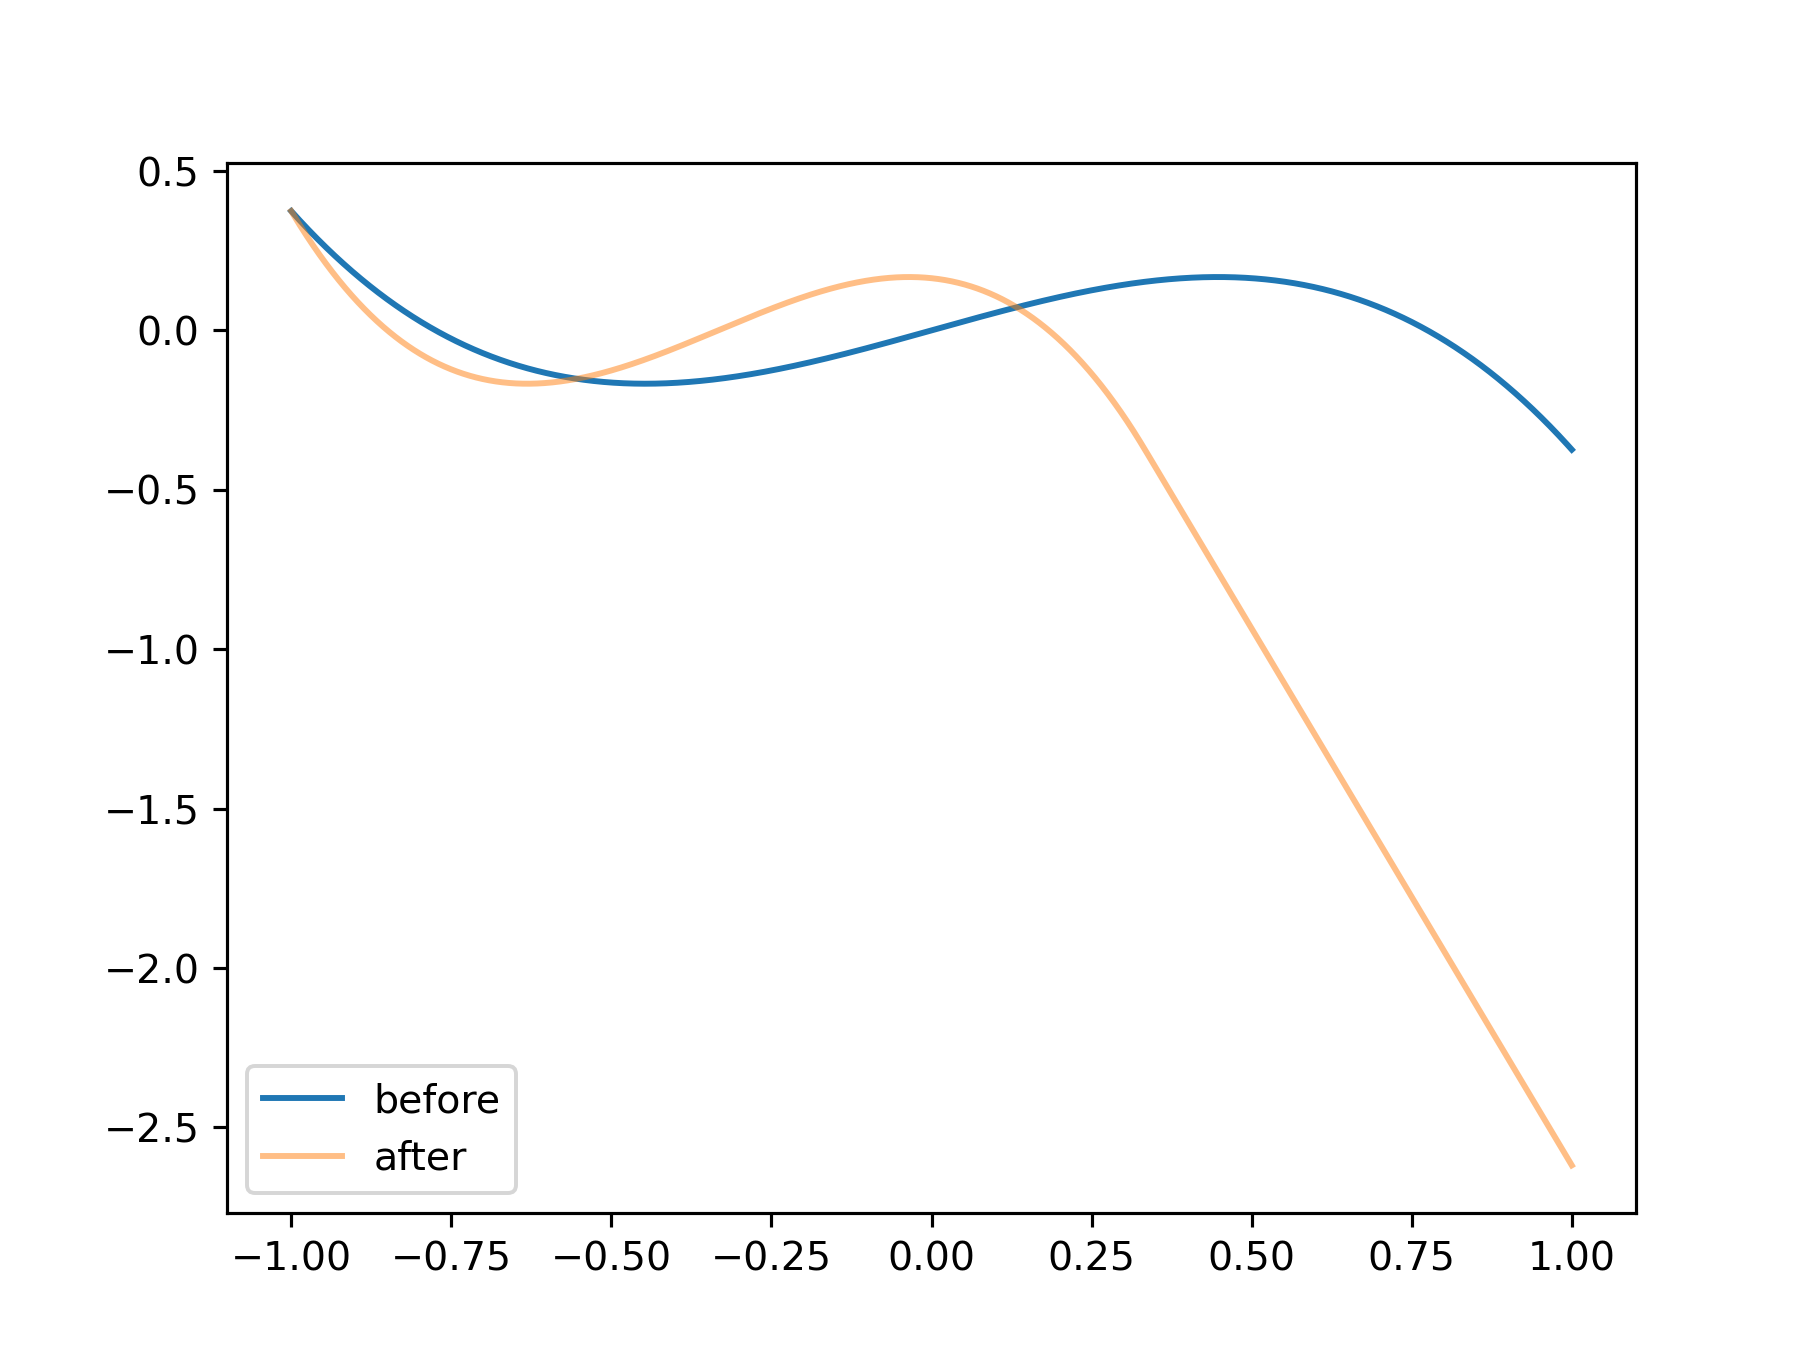

In [3]:
n = 128
hippo = UnHiPPOSystem(n, rho=0.25, discretization_method="expm", regularize_derivative=True, covariance_type="qr")
hippo = hippo.double()
T = np.linspace(1, 5, 100)
A_ks = hippo.transition_matrix(2).float()

start = torch.zeros(n)
start[3] = -0.2
poly_before = hippo.reconstruct(start)
poly_after = hippo.reconstruct(A_ks @ start)
x = np.linspace(-1, 1, 10000)
pp.plot(x, poly_before(x), label="before")
pp.plot(x, poly_after(x), alpha=0.5, label="after")
#pp.ylim((-2, 3))
#pp.xlim((0.9, 1.01))
pp.legend()